In [41]:
# imports all librabies 

import numpy as np 
import pandas as pd 
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns

with open('rideshare_kaggle.csv', mode='r') as file:

    csv_reader = csv.reader(file)

    next (csv_reader, None)

In [42]:
# called main DataFrame

data_frame = pd.read_csv('rideshare_kaggle.csv')
data_frame.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [43]:
# define all Sub Frames
source_counts = data_frame.groupby(['source', 'cab_type'])['id'].count().unstack().fillna(0)
destination_counts = data_frame.groupby(['destination', 'cab_type'])['id'].count().unstack().fillna(0)

# Convert the timestamp column to datetime
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'], unit='s')

# Count rides by hour for both Uber and Lyft
hourly_counts = data_frame.groupby([data_frame['timestamp'].dt.hour, 'cab_type'])['id'].count().unstack().fillna(0)

# Add final price to the data frame
data_frame['final_price'] = final_price

# Group by destination and calculate mean final price
mean_final_price = data_frame.groupby('destination')['final_price'].mean()


price = np.array(data_frame['price'])
surge_multiplier = np.array(data_frame['surge_multiplier'])

# Calculate final price
final_price = price * surge_multiplier

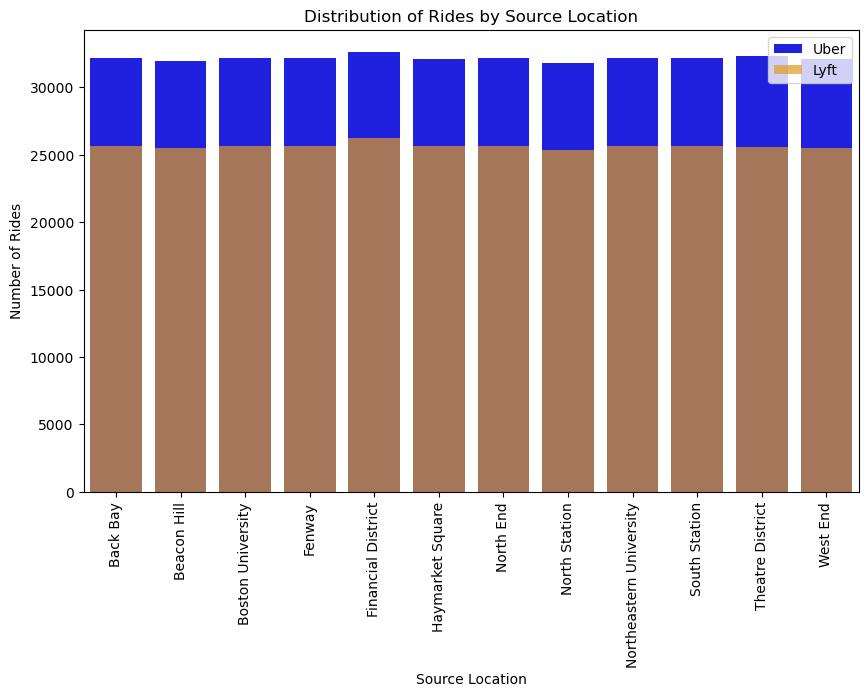

In [44]:
#Distribution of Rides by Source Location

#  Count rides by source location for both Uber and Lyft
source_counts = data_frame.groupby(['source', 'cab_type'])['id'].count().unstack().fillna(0)

# Create a bar plot to visualize the distribution of rides by source location
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts['Uber'], label='Uber', color='blue')
sns.barplot(x=source_counts.index, y=source_counts['Lyft'], label='Lyft', color='orange', alpha=0.7)
plt.xlabel('Source Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Source Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

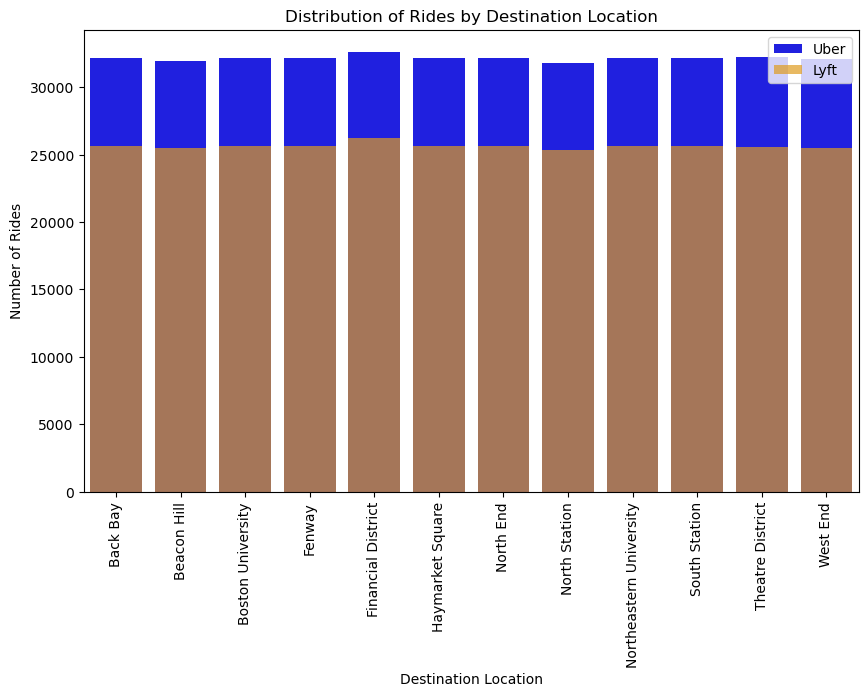

In [45]:
#Distribution of Rides by Destination Location'
# Count rides by destination location for both Uber and Lyft
destination_counts = data_frame.groupby(['destination', 'cab_type'])['id'].count().unstack().fillna(0)

# Create a bar plot to visualize the distribution of rides by destination location
plt.figure(figsize=(10, 6))
sns.barplot(x=destination_counts.index, y=destination_counts['Uber'], label='Uber', color='blue')
sns.barplot(x=destination_counts.index, y=destination_counts['Lyft'], label='Lyft', color='orange', alpha=0.7)
plt.xlabel('Destination Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Destination Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

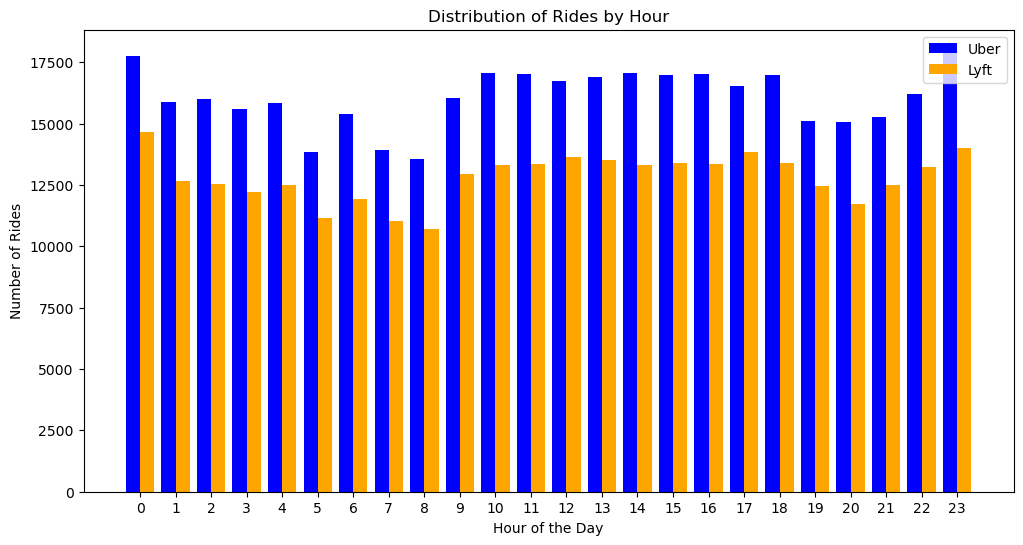

In [46]:
#'Distribution of Rides by Hour

# Convert the timestamp column to datetime
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'], unit='s')

# Count rides by hour for both Uber and Lyft
hourly_counts = data_frame.groupby([data_frame['timestamp'].dt.hour, 'cab_type'])['id'].count().unstack().fillna(0)

# Create a bar plot to visualize the distribution of rides by hour
plt.figure(figsize=(12, 6))

# Calculate width of each bar
bar_width = 0.4

# Calculate the x positions for each bar group
r1 = hourly_counts.index - bar_width / 2
r2 = hourly_counts.index + bar_width / 2

# Plotting Uber rides
plt.bar(r1, hourly_counts['Uber'], width=bar_width, label='Uber', color='blue')

# Plotting Lyft rides
plt.bar(r2, hourly_counts['Lyft'], width=bar_width, label='Lyft', color='orange')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Hour')
plt.xticks(hourly_counts.index)
plt.legend()
plt.show()

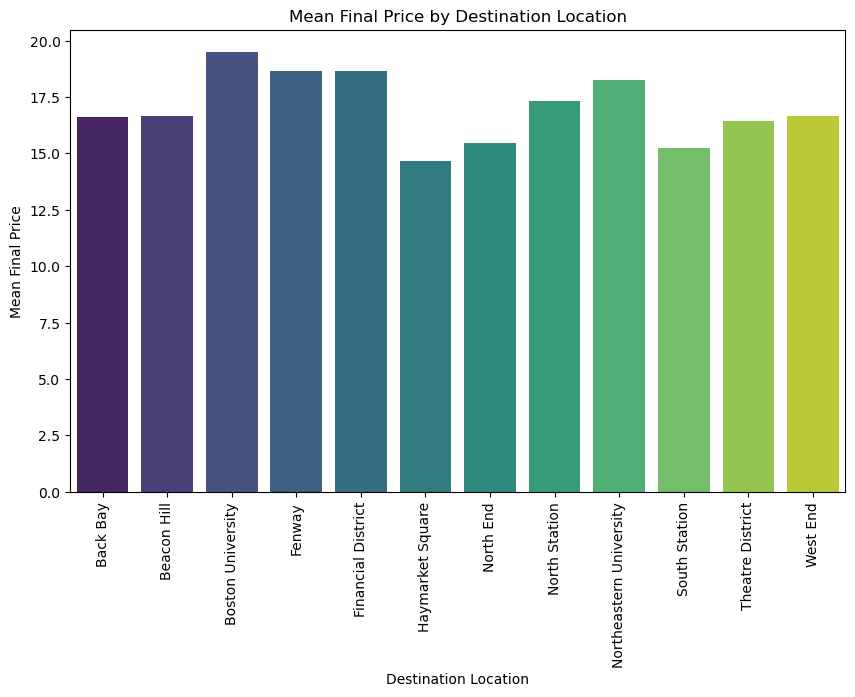

In [47]:
#Mean Final Price by Destination Location')



# Calculate final price
price = np.array(data_frame['price'])
surge_multiplier = np.array(data_frame['surge_multiplier'])
final_price = price * surge_multiplier

# Add final price to the data frame
data_frame['final_price'] = final_price

# Group by destination and calculate mean final price
mean_final_price = data_frame.groupby('destination')['final_price'].mean()

# Create a bar plot to visualize the mean final price by destination location
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_final_price.index, y=mean_final_price.values, palette='viridis')

plt.xlabel('Destination Location')
plt.ylabel('Mean Final Price')
plt.title('Mean Final Price by Destination Location')
plt.xticks(rotation=90)
plt.show()


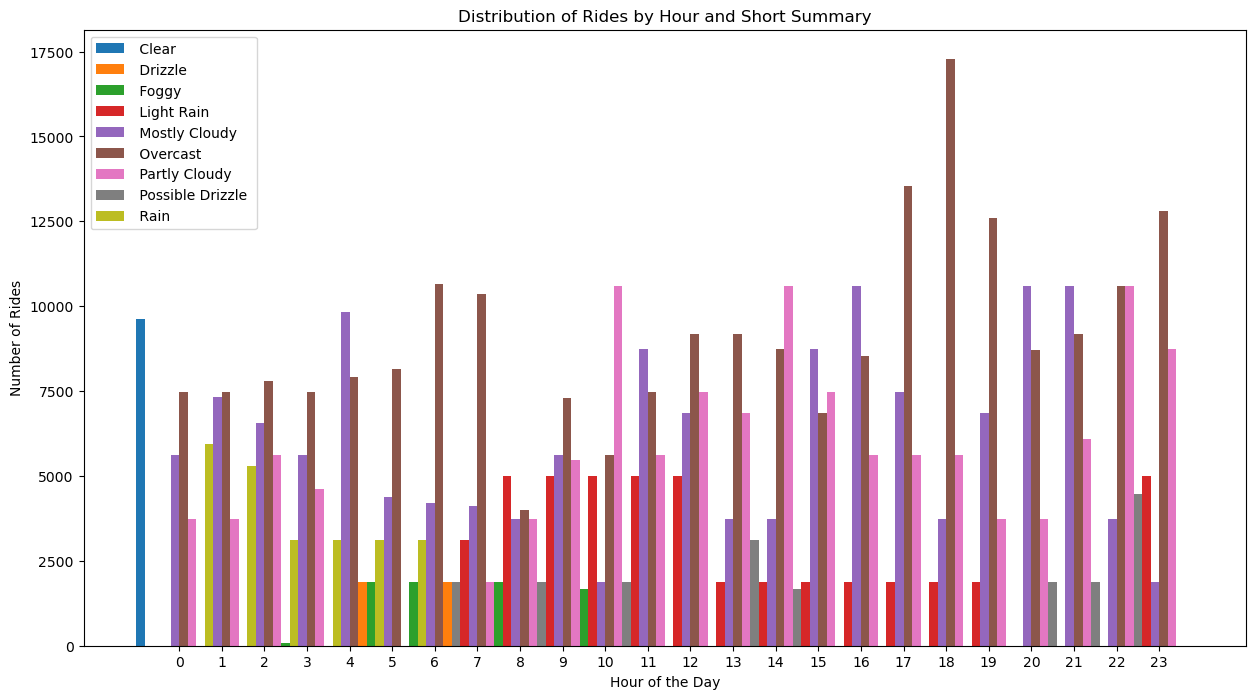

In [48]:
import matplotlib.pyplot as plt

# Assuming 'short_summary' and 'timestamp' columns are in your data_frame

# Grouping by hour and short summary, then counting occurrences
hourly_short_summary_counts = data_frame.groupby([data_frame['timestamp'].dt.hour, 'short_summary'])['id'].count().unstack().fillna(0)

# Define the bar width and positions
bar_width = 0.2  # Reduce the width to fit more bars
positions = range(len(hourly_short_summary_counts.index))

# Create a wider figure
plt.figure(figsize=(15, 8))  # Adjust the width (15) and height (8) as needed

# Plotting Short Summary rides
for idx, summary in enumerate(hourly_short_summary_counts.columns):
    plt.bar([p + idx * bar_width for p in positions], hourly_short_summary_counts[summary], width=bar_width, label=summary)

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Hour and Short Summary')
plt.xticks([p + bar_width * (len(hourly_short_summary_counts.columns) / 2) for p in positions], hourly_short_summary_counts.index)
plt.legend()
plt.show()
